# A Case Study

In [1]:
import pywrapfst as fst
n = 2
m = 2
syms = fst.SymbolTable()
syms.add_symbol('e')  # Epsilon (empty character)
for i in range(n):
    for j in range(m):
        sym = 't^'+str(i+1)+'_'+str(j+1)
        syms.add_symbol(sym)

## Plant $\mathcal{P}$

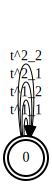

In [2]:
P = fst.Fst()
P.add_state()
P.set_start(0).set_final(0)
for k in range(m*n):
    P.add_arc(0,fst.Arc(k+1,k+1,0,0))
P.set_input_symbols(syms).set_output_symbols(syms).arcsort()

## Model of the Desired Language $K$ 

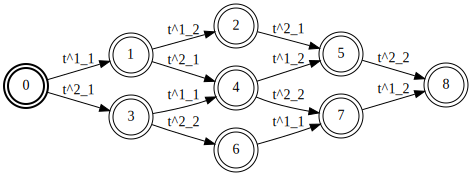

In [3]:
MK = fst.Fst()
for k in range((m+1)**n):
    MK.set_final(MK.add_state())
MK.set_start(0)

for s in range((m+1)**n):
    q = s
    for d in range(n):
        r = q % (m+1)
        if r < m:
            t = s + (m+1)**d
            l = r + m*d + 1
            MK.add_arc(s,fst.Arc(l,l,0,t))
        q = q // (m+1)
        
MK.set_input_symbols(syms).set_output_symbols(syms).arcsort()

## Output Attacker $\mathcal{A}_O$

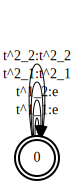

In [4]:
# AO = fst.Fst()
# for s in range(m):
#     AO.set_final(AO.add_state())
# AO.set_start(0)

# for j in range(m):
#     t = (j+1)%m
#     for i in range(n):
#         il = j + m*i + 1
#         ol = il if i else 0
#         AO.add_arc(j,fst.Arc(il,ol,0,t))
        
# AO.set_input_symbols(syms).set_output_symbols(syms).arcsort()

AO = fst.Fst()
AO.add_state()
AO.set_final(0).set_start(0)
for i in range(n):
    for j in range(m):
        il = j + m*i + 1
        ol = il if i else 0
        AO.add_arc(0,fst.Arc(il,ol,0,0))
        
AO.set_input_symbols(syms).set_output_symbols(syms).arcsort()

## Input Attacker $\mathcal{A}_{I}$

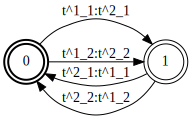

In [5]:
AI = fst.Fst()
for s in range(n):
    AI.set_final(AI.add_state())
AI.set_start(0)

for i in range(n):
    t = (i+1)%n
    for j in range(m):
        il = j + m*i + 1
        ol = j + m*t + 1
        AI.add_arc(i,fst.Arc(il,ol,0,t))
                   
AI.set_input_symbols(syms).set_output_symbols(syms).arcsort()

## Supervisor $\mathcal{S}$
$$
\mathcal{S} = \mathcal{A}^{-1}_0 \circ \mathcal{M}_K \circ \mathcal{A}^{-1}_I
$$

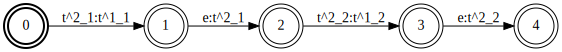

In [19]:
S = fst.compose(fst.compose(AO.copy().invert(),MK),AI.copy().invert())
S.arcsort()

## Output Language $L_O(\mathcal{A}_O \circ \mathcal{S} \circ \mathcal{A}_I)$

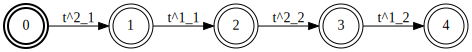

In [21]:
LO = fst.compose(fst.compose(AO,S).arcsort(),AI).project(project_output=True)
LO = fst.determinize(fst.epsnormalize(LO)).minimize()
LO.arcsort()

## $L_O(\mathcal{A}_O \circ \mathcal{S} \circ \mathcal{A}_I) \stackrel{?}{=} K$

In [22]:
K = fst.epsnormalize(MK.copy().project(project_output=True)).minimize().arcsort()
fst.equivalent(LO,K)

False